# Bellabeat Data Analysis Project

## Background

Bellabeat is a high-tech manufactuer focusng of women health since 2013. Their well-designed products includes the Bellabeat app, wellness trackers Leaf, Time and Spring, as well as the Bellabeat membership, which forms a strong ecosystem to empower women with the knowledge abour their own health and habits. Now, Bellabeat is seeking more opportunities to grow by learning the current smart device market. 

### Business Objectives
The key task of this report is to analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the their smart devices and give high-level recommendation for Bellabeat's marketing stretegy. 

### Key Stakeholders
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.


## Data Preparation

### Import packages and dataset

In [267]:
# import packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime as dt 

In [268]:
# import data 
activity = pd.read_csv("/Users/yuefei/Documents/Code/Bellabeat-data-analysis-project/Data/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories = pd.read_csv("/Users/yuefei/Documents/Code/Bellabeat-data-analysis-project/Data/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
intensities = pd.read_csv("/Users/yuefei/Documents/Code/Bellabeat-data-analysis-project/Data/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
steps = pd.read_csv("/Users/yuefei/Documents/Code/Bellabeat-data-analysis-project/Data/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep = pd.read_csv("/Users/yuefei/Documents/Code/Bellabeat-data-analysis-project/Data/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight = pd.read_csv("/Users/yuefei/Documents/Code/Bellabeat-data-analysis-project/Data/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

#### Daily Activity

In [269]:
# Have a look at the first 5 rows and the basic information
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [270]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Check if there is any missing data in daily activity. Turns out no missing data in the activity table. 

In [271]:
# checking null values
missing_values = activity.isnull().sum()
missing_values

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Check the user number in this dataset and their id

In [272]:
# checking the sample size and their unique user number
unique_id = np.unique(activity.Id)
unique_user_number = np.count_nonzero(unique_id)
unique_id, unique_user_number

(array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
        2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
        3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
        4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
        5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
        7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
        8583815059, 8792009665, 8877689391]),
 33)

The activity data can be observed: 
* The activity table has 15 columns and 940 rows
* No missing data
* The sample size is 33, which is quite small. 
* The issue here is that date is marked as `object`. 

Meanwhile, I would like to check the other tables to see whether the data type issue is common. 

#### Calories

In [273]:
# checking calories table
calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [274]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [275]:
calories_missing_values = calories.isnull().sum()
calories_missing_values

Id             0
ActivityDay    0
Calories       0
dtype: int64

#### Intensities

In [276]:
# Intensities table
intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [277]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [278]:
intensities_missing_values = intensities.isnull().sum()
intensities_missing_values

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

#### Steps

In [279]:
# steps table
steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [280]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [281]:
steps_missing_values = steps.isnull().sum()
steps_missing_values

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

#### Sleep

In [282]:
# sleep
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [283]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [284]:
sleep_missing_values = sleep.isnull().sum()
sleep_missing_values

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

#### Weight

In [285]:
# weight
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [286]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [287]:
weight_missing_values = weight.isnull().sum()
weight_missing_values

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

After checking all the tables, it is confirmed that all the date are stored as object. 

The following date transformation will be performed: 
1. All the date is converted from `object` to `datetime`
2. The date is formatted to ``dd-mm-yyyy`` as commonly used in Australia
3. Date with daytime like `5/2/2016 11:59:59 PM` will be split into two columns

As the Calories, Intensities, Steps data are included in the daily activity table,  these three table will not be used in the following steps. We will mainly look at the daily activity table.

### Data Transformation

In [288]:
# convert the activity data time
activity["ActivityDate"] = pd.to_datetime(activity["ActivityDate"],format="%m/%d/%Y")
activity["DayofWeek"] = activity["ActivityDate"].dt.day_name()

# add up total activity time
activity["TotalActiveMinutes"] = activity["FairlyActiveMinutes"] + activity["LightActiveDistance"] + activity["VeryActiveMinutes"] + activity["SedentaryMinutes"]

# active time in hour
activity["TotalActiveHours"] = round(activity["TotalActiveMinutes"]/60, 2)
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayofWeek,TotalActiveMinutes,TotalActiveHours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,772.06,12.87
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,820.71,13.68
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1262.91,21.05
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,791.83,13.20
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,824.04,13.73


In [289]:
# rename column name
act_new_col_name = {
        "Id":"id", 
        "ActivityDate":"date",
        "TotalSteps":"total_steps", 
        "TotalDistance":"total_dist", 
        "TrackerDistance":"track_dist",
        "LoggedActivitiesDistance":"logged_dist", 
        "VeryActiveDistance":"very_active_dist", 
        "ModeratelyActiveDistance":"moderate_active_dist", 
        "LightActiveDistance":"light_active_dist", 
        "SedentaryActiveDistance":"sedentary_active_dist", 
        "VeryActiveMinutes":"very_active_mins", 
        "FairlyActiveMinutes":"fairly_active_mins", 
        "LightlyActiveMinutes":"lightly_active_mins", 
        "SedentaryMinutes":"sedentary_mins", 
        "Calories":"calories",
        "DayofWeek":"day_of_week", 
        "TotalActiveMinutes":"total_active_mins",
        "TotalActiveHours":"total_active_hours"
        }
   
# reorder the columns
act_new_col_order = [
        "id", "date","day_of_week", "total_steps", "total_dist", 
        "track_dist", "logged_dist", "very_active_dist", 
        "moderate_active_dist", "light_active_dist", "sedentary_active_dist", 
        "very_active_mins", "fairly_active_mins", "lightly_active_mins", 
        "sedentary_mins", "total_active_mins", "total_active_hours", "calories"
        ]

# update the table
activity = activity.rename(columns=act_new_col_name)[act_new_col_order]

#check the updated activity data
activity.head()

,id,date,day_of_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_active_mins,total_active_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,772.06,12.87,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,820.71,13.68,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1262.91,21.05,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,791.83,13.20,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,824.04,13.73,1863


In [290]:
# format and split the column into date, time and day of week
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"],format="%m/%d/%Y %H:%M:%S %p") # format
sleep["DayofWeek"] = sleep["SleepDay"].dt.day_name() # add new column, assign day of week
sleep["SleepTime"] = sleep["SleepDay"].dt.time # add the time column, slice the time
sleep["SleepDay"] = sleep["SleepDay"].dt.date # slice date

# reorganize the column order
sleep_new_column = ["Id", "SleepDay", "SleepTime", "DayofWeek","TotalSleepRecords", "TotalMinutesAsleep", "TotalTimeInBed"]
sleep = sleep[sleep_new_column] 

In [291]:
sleep.head()

,Id,SleepDay,SleepTime,DayofWeek,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,12:00:00,Tuesday,1,327,346
1,1503960366,2016-04-13,12:00:00,Wednesday,2,384,407
2,1503960366,2016-04-15,12:00:00,Friday,1,412,442
3,1503960366,2016-04-16,12:00:00,Saturday,2,340,367
4,1503960366,2016-04-17,12:00:00,Sunday,1,700,712


In [292]:
# format and split the column into date, time and day of week
weight["Date"] = pd.to_datetime(weight["Date"],format="%m/%d/%Y %I:%M:%S %p")
weight["DayofWeek"] = weight["Date"].dt.day_name() # add new column, assign day of week
weight["Time"] = weight["Date"].dt.time # add the time column, slice the time
weight["Date"] = weight["Date"].dt.date # slice date

# reorganize the column order
weight_new_column = ["Id", "Date", "Time", "DayofWeek", "Fat", "BMI", "IsManualReport", "LogId"]
weight = weight[weight_new_column]
weight.head()

,Id,Date,Time,DayofWeek,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02,23:59:59,Monday,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03,23:59:59,Tuesday,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13,01:08:52,Wednesday,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21,23:59:59,Thursday,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12,23:59:59,Thursday,NaN,21.690001,True,1463097599000


In [293]:
# merge activity and sleep table as we will look at the correlations later
# Convert 'SleepDay' to datetime format
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

# Convert 'ActivityDate' in the fitbit_data to the same format as 'SleepDay'
activity['date'] = pd.to_datetime(activity['date'])

# Merge the sleep data with the activity data on 'Id' and 'Date'
merged_actitivty_data = pd.merge(activity, sleep, how='inner', left_on=['id', 'date'], right_on=['Id', 'SleepDay'])

# Display the first few rows of the merged data
merged_actitivty_data.head()

,id,date,day_of_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,...,total_active_mins,total_active_hours,calories,Id,SleepDay,SleepTime,DayofWeek,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,772.06,12.87,1985,1503960366,2016-04-12,12:00:00,Tuesday,1,327,346
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,...,820.71,13.68,1797,1503960366,2016-04-13,12:00:00,Wednesday,2,384,407
2,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,...,791.83,13.20,1745,1503960366,2016-04-15,12:00:00,Friday,1,412,442
3,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,...,824.04,13.73,1863,1503960366,2016-04-16,12:00:00,Saturday,2,340,367
4,1503960366,2016-04-17,Sunday,9705,6.48,6.48,0.0,3.19,0.78,2.51,...,599.51,9.99,1728,1503960366,2016-04-17,12:00:00,Sunday,1,700,712


# Analysis

## Summary of user daily activity:

In [294]:
# overview on the activity table
activity.describe()

,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_active_mins,total_active_hours,calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1029.281245,17.154681,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,782.520000,13.040000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1105.975000,18.430000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1268.055000,21.130000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,293.370914,4.889476,718.166862


/var/folders/vw/7h9hg1t92hz36bgfwx6_kcwm0000gn/T/ipykernel_1024/2489649799.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


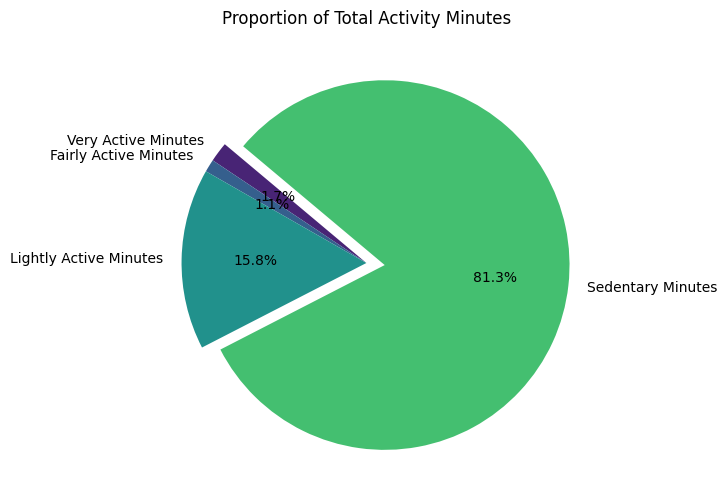

In [339]:
# Calculate the total minutes for each category
total_minutes = {
    'Very Active Minutes': activity['very_active_mins'].sum(),
    'Fairly Active Minutes': activity['fairly_active_mins'].sum(),
    'Lightly Active Minutes': activity['lightly_active_mins'].sum(),
    'Sedentary Minutes': activity['sedentary_mins'].sum()
}

# Generating colors using the 'viridis' colormap
cmap = cm.get_cmap('viridis')
colors = cmap([0.1, 0.3, 0.5, 0.7,0.9])

explode = [0, 0, 0, 0.1]
plt.figure(figsize=(6, 6))
plt.pie(total_minutes.values(),
        labels=total_minutes.keys(), 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140,
        explode = explode)
plt.title('Proportion of Total Activity Minutes')
plt.show()

In general: 
1. Average Steps: 
Users take an average of approximately 7,638 steps daily, in other words that is about 5.5 kilometers per day. 

2. Average Calories Burned: 
The mean calories burned is around 2,303, with a range extending up to 4,900 calories.

3. Activity Levels: <br>
a. Very active minutes: for an average of 21 minutes per day <br>
b. Fairly active minutes:13.6 minutes per day <br>
c. Light activity: around 193 minutes per day on avergae <br>
d. Sedentary time: 991 minutes on average, which is the majority of logged time.


## User segmentation on activity level

Users can be categories into 5 activity level based on their daily steps taken: 
* Sedentary: Less than 5,000 steps daily
* Low active: About 5,000 to 7,499 steps daily
* Somewhat active: About 7,500 to 9,999 steps daily
* Active: 10,000 - 12,499 steps daily 
* Highly active: More than 12,500 steps daily

In [343]:
# segment users in to activity levels based on total steps
activity_level_bins = [0, 5000, 7500, 10000, 12500, 40000]
activity_labels = ['Sedentary','Low Active', 'Somewhat Active', 'Active', 'Highly Active']
activity['activity_level'] = pd.cut(activity['total_steps'], 
                                          bins = activity_level_bins, 
                                          labels = activity_labels,
                                          include_lowest = True)

# Group by avtivity level
activity_level_summary = activity.groupby('activity_level')

/var/folders/vw/7h9hg1t92hz36bgfwx6_kcwm0000gn/T/ipykernel_1024/2702927750.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_level_summary = activity.groupby('activity_level')


In [335]:
activity_level_summary = activity_level_summary.agg({
    'total_steps': 'mean',
    'calories': 'mean',
    'very_active_mins': 'mean',
    'fairly_active_mins': 'mean',
    'lightly_active_mins': 'mean',
    'sedentary_mins': 'mean'
}).reset_index()

In [336]:
activity_level_summary

,activity_level,total_steps,calories,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins
0,Sedentary,2128.168317,1806.811881,2.336634,1.973597,88.214521,1132.471947
1,Low Active,6264.233918,2254.210526,8.122807,6.894737,237.385965,988.257310
2,Somewhat Active,8726.294479,2461.073620,18.950920,16.441718,256.779141,922.349693
3,Active,11075.779874,2547.886792,34.823899,24.930818,231.528302,867.823899
4,Highly Active,15834.597222,2959.652778,63.694444,30.069444,244.819444,911.666667


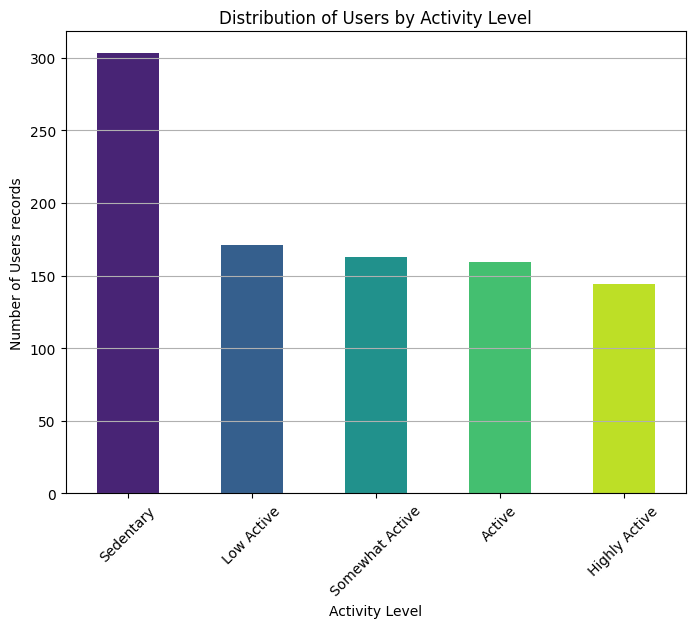

In [353]:
# Count the number of users in each activity segment
activity_level_counts = activity['activity_level'].value_counts().reindex(activity_labels)

# Plot the distribution of activity levels
plt.figure(figsize=(8, 6))
activity_level_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Users by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Number of Users records')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()


User segementation seems consistent with the activity time that most of the users can be accessed into a sedentary level. 

## Relationships between steps and total calories burned 

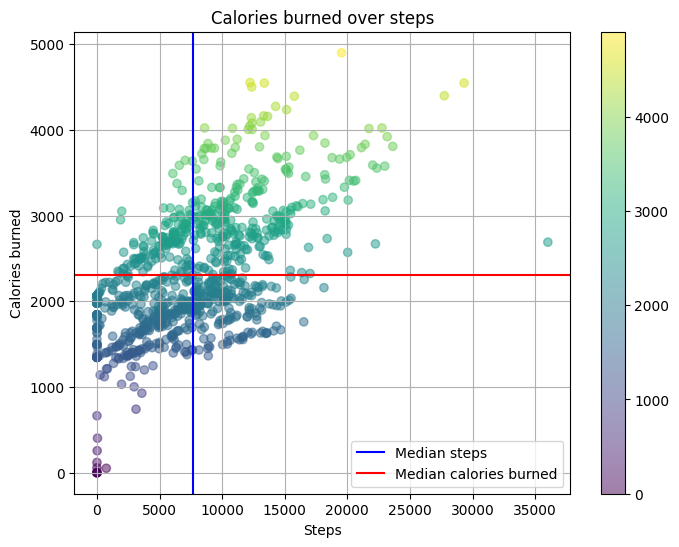

In [341]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) 
plt.scatter(activity.total_steps, activity.calories, 
            alpha = 0.5, c = activity.calories, 
            cmap = "viridis")

# add mdiam value 
median_calories = 2303
median_steps = 7638

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps")
plt.ylabel("Calories burned")
plt.title("Calories burned over steps")
plt.grid(True)
plt.legend()
plt.show()

From the diagram it can be seen: 

1. Calories burned and steps are positively corelated. 
2. Most user seem belong to the lower-middle range of steps and calories. 
3. Outliers:<br>
    a. Zero steps with zero to minimal calories burned <br>
    b. A record falls in above 35000 steps but only consumes about 2500 calories, might be related to low intensity or manual log issue. <br>

## Relationships between activity minutes and sleep minutes

# Recommendation

Some recommendations can be made based on the analysis above. 

##  Based on user segmentation

1. Sendentary and Low Active Users: <br>
Strategy can focus on motivation and incremental challenges. Add in-app challenges tailored for fitness beginners, or push notifications every hour for some exercise and relaxation. 

2. Somewhat Active Users: <br>
Customized motivation and challenges to help users keep workout consistency. 

3. Active Users: <br>
Promote advanced fitness tracking features and personalized coaching.

4. Highly Active Users: <br>
Promote advanced fitness tracking features and personalized coaching, also remind users to keep safe. 

## Based on product features

1. Data Driven Personalization: <br>
Leverage the insights from user activity data to create highly personalized marketing messages. For example, if a user consistently shows high sedentary behavior, send tips to encourage short walking breaks. Or there can be notifications to remind user to take a walk if they was walking the same time previous days.

2. Gamify challenges to motivate users <br>
Make notification or challenges more interesting by gamify them. Maybe add some rewards or titles. 

3. Form communities in the app <br>
Since there's already an app, we can add a forum to engage all the users to share motivations and acitivity feedbacks, increasing user retention. 

4. Seasonal Challenges. 


## Channels Involved

Consider social media, in-app notification, in-app forum